# matplotlib notes

## Matplotlib Architecture
### Backend Layer
* Deals with the rendering of plots to screen or files
* In Jupyter notebooks we use the inline backend

### Artist Layer
* Contains containers such as Figure, Subplot, and Axes
* Contains primitives, such as a Line2D and Rectangle, and collections such as a PathCollection

### Scripting Layer
* Simplfies access to the Artist and Backend layers.

<IPython.core.display.Javascript object>


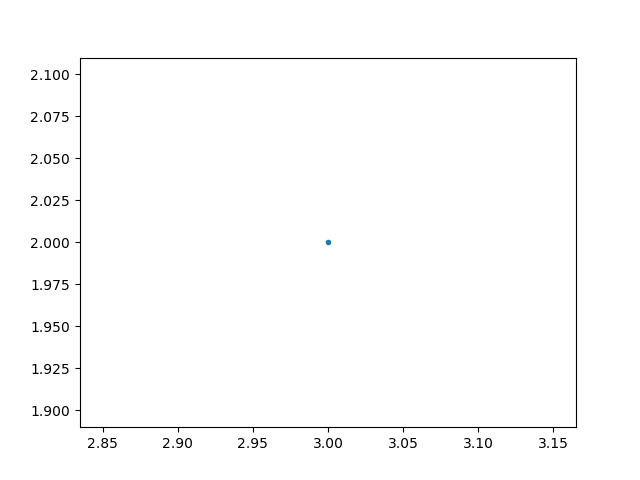

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(3,2,'.')

<IPython.core.display.Javascript object>


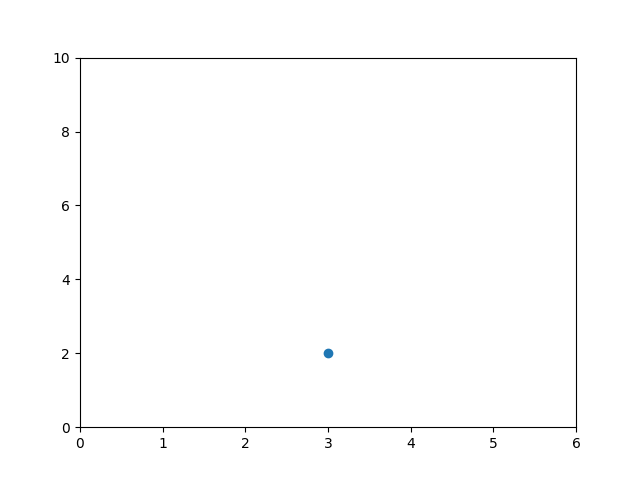

In [2]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

# get all the child objects the axes contains
ax.get_children()

## Scatterplots

<IPython.core.display.Javascript object>


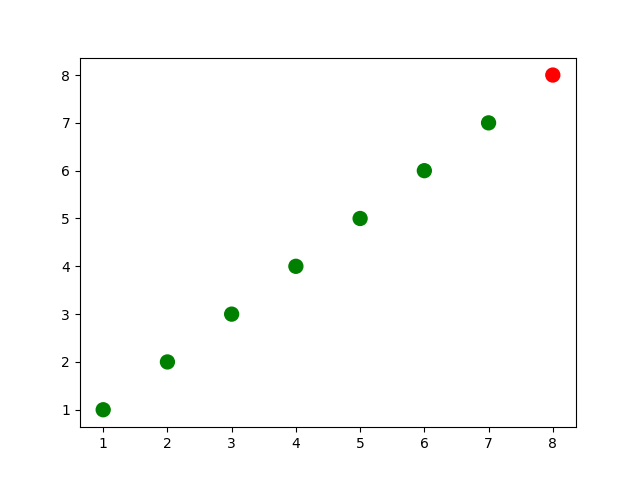

In [3]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x

colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x,y, s=100,c=colors)

In [4]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


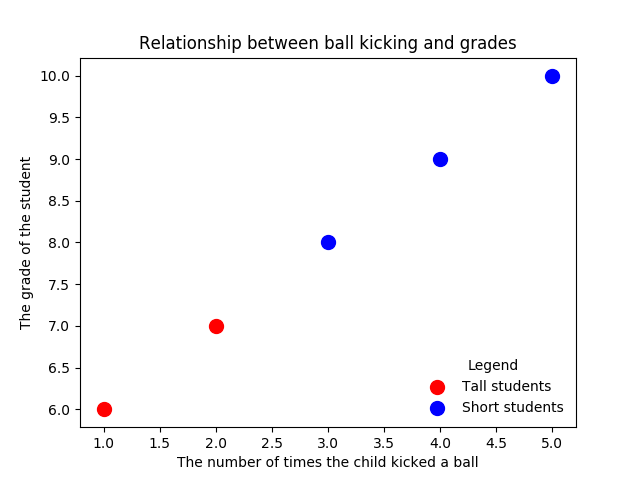

In [5]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

## Line Plots

<IPython.core.display.Javascript object>


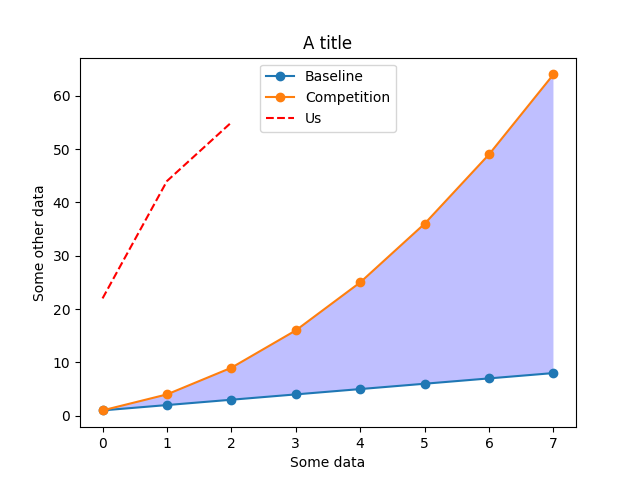

In [6]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

<IPython.core.display.Javascript object>


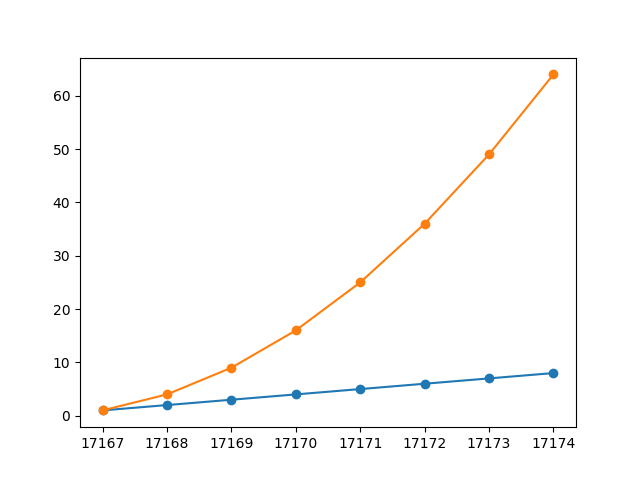

In [7]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>


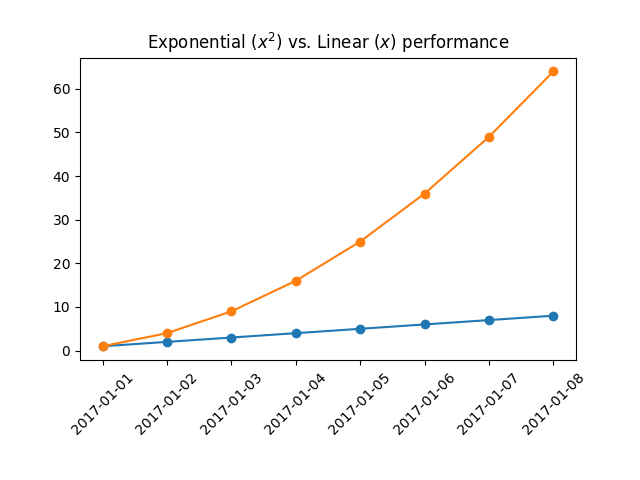

In [8]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

# you can add mathematical expressions in any text element
ax = plt.gca()
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

## Bar Charts

<IPython.core.display.Javascript object>


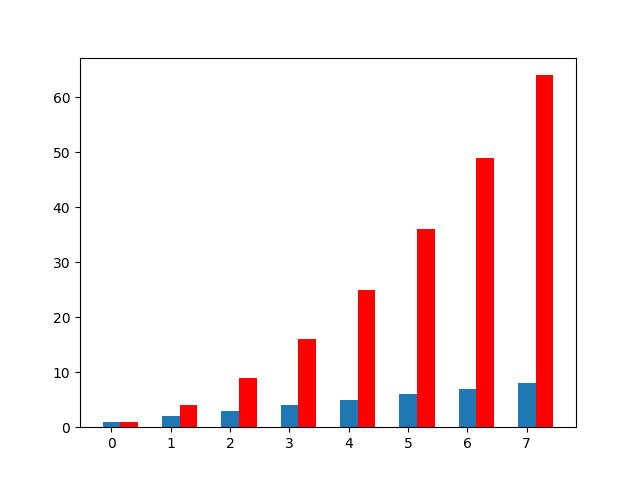

<Container object of 8 artists>

In [9]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [10]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

<IPython.core.display.Javascript object>


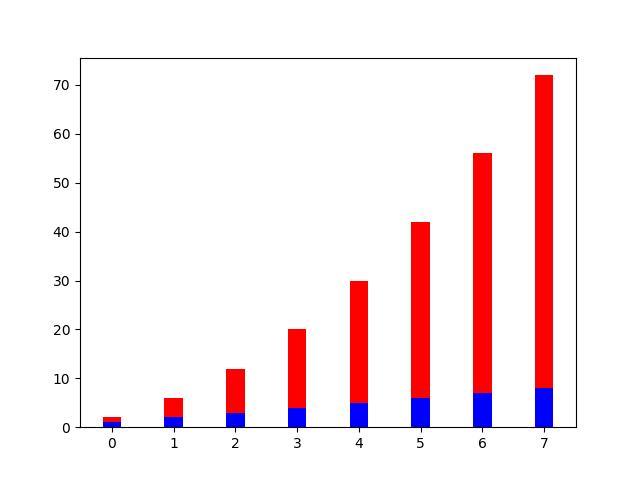

<Container object of 8 artists>

In [11]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


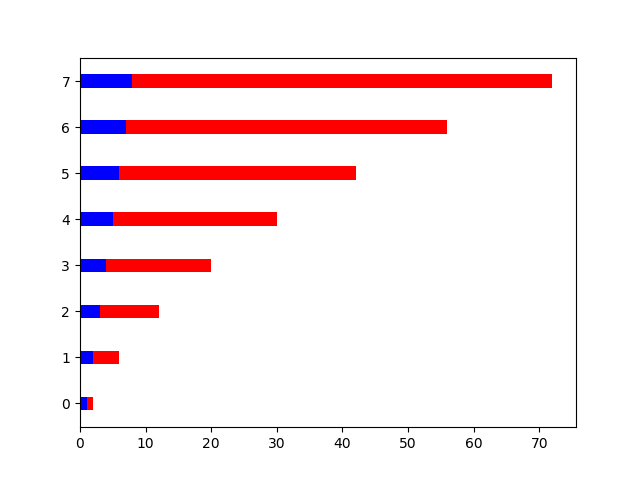

<Container object of 8 artists>

In [12]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

### Plot Record Max and Min Temperatures (2005-2014)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Fetch the original data
weather_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c70211946acf33c.csv')

# Change TimeStamp
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# The value is tenths of degrees C, change the value to degree
weather_df['Data_Value'] = weather_df['Data_Value'] * 0.1

# Weather 2015
weather_df_2015 = weather_df[weather_df['Date'].dt.year == 2015]

# Select the data between 2005-01-01 to 2014-12-31
weather_df = weather_df.loc[(weather_df['Date'] > pd.to_datetime('2004-12-31')) & (weather_df['Date'] < pd.to_datetime('2015-01-01'))]

# Define a function to recognize leap day
def isleapday(date):
    if (date.month == 2) & (date.day == 29):
        return True
    else:
        return False
    
# Remove leap days
weather_df['Leap Day'] = weather_df['Date'].apply(isleapday)
weather_df = weather_df[weather_df['Leap Day'] == False]

# Fetch the record max and min temprature of each day in the year in 2005-2014 of all stations
tmax = weather_df.groupby([weather_df['Date'].dt.month.rename('Month'), weather_df['Date'].dt.day.rename('Day')])['Data_Value'].max()
tmin = weather_df.groupby([weather_df['Date'].dt.month.rename('Month'), weather_df['Date'].dt.day.rename('Day')])['Data_Value'].min()

# Fetch the max and min temprature of each day in 2015 of all stations
tmax_2015 = weather_df_2015.groupby([weather_df_2015['Date'].dt.month.rename('Month'), weather_df_2015['Date'].dt.day.rename('Day')])['Data_Value'].max()
tmin_2015 = weather_df_2015.groupby([weather_df_2015['Date'].dt.month.rename('Month'), weather_df_2015['Date'].dt.day.rename('Day')])['Data_Value'].min()

# Record broken in 2015
tmaxrecord_2015 = tmax_2015[tmax_2015 > tmax]
tminrecord_2015 = tmin_2015[tmin_2015 < tmin]

# Plot the max and min temperatures
plt.figure(figsize = (20,16))
ax1 = tmax.plot(c='green', label = 'High Record (2005-2014)')
ax2 = tmin.plot(c='orange', label = 'Low Record (2005-2014)')

# Plot the record broken in 2015
tmaxrecord_2015.reindex(tmax.index).plot(marker = 'o', linestyle='none', c='blue', label = 'High Record-Broken 2015')
tminrecord_2015.reindex(tmin.index).plot(marker = 'o', linestyle='none', c='red', label = 'Low Record-Broken 2015')

# fill the area between max and min temperatures
plt.gca().fill_between(range(len(tmax)), 
                       tmax, tmin, 
                       facecolor='grey', 
                       alpha=0.25)

# Assign labels and title
plt.ylabel('Temperature ($^\circ$C)', fontsize = 'x-large')
plt.xlabel('Month/Day', fontsize = 'x-large')
plt.title('Record Max and Min Temperatures (2005-2014) in Akershus Norway', fontsize = 'x-large')

# Set the legend
plt.legend(loc=8, frameon=False, title='Legend', fontsize = 'x-large')

# Change the axis label from int to month name
ax1.set_xticks(list(range(0,360,30)))
ax2.set_xticklabels([datetime.datetime(2005,month,1).strftime('%b') for month in range(1,13)])


# Show the figure
plt.show()

### Subplot

<IPython.core.display.Javascript object>


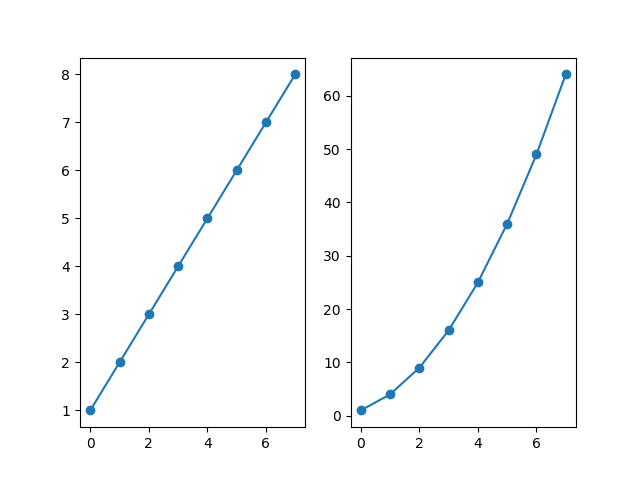

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

<IPython.core.display.Javascript object>


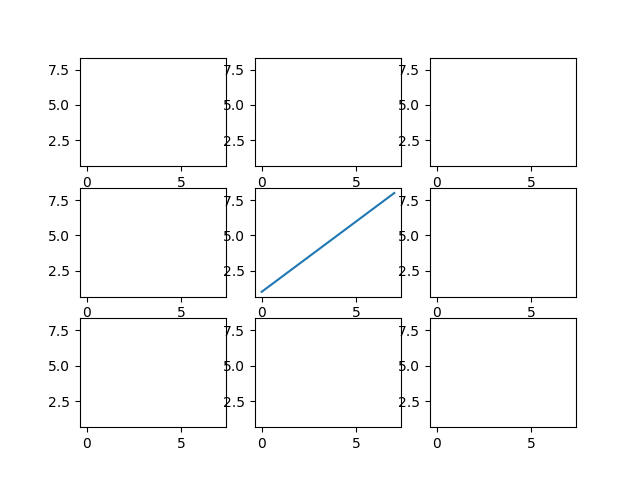

In [14]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
        
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

### Histograms

<IPython.core.display.Javascript object>


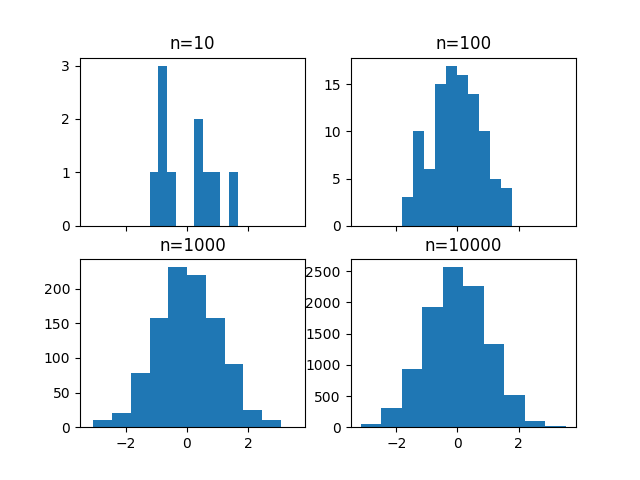

In [15]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


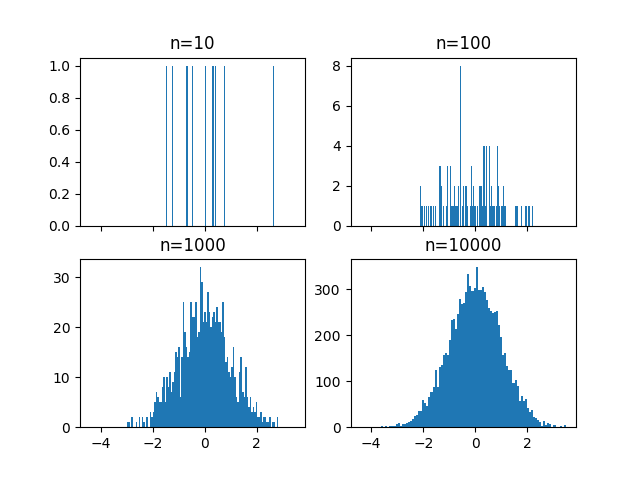

In [16]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


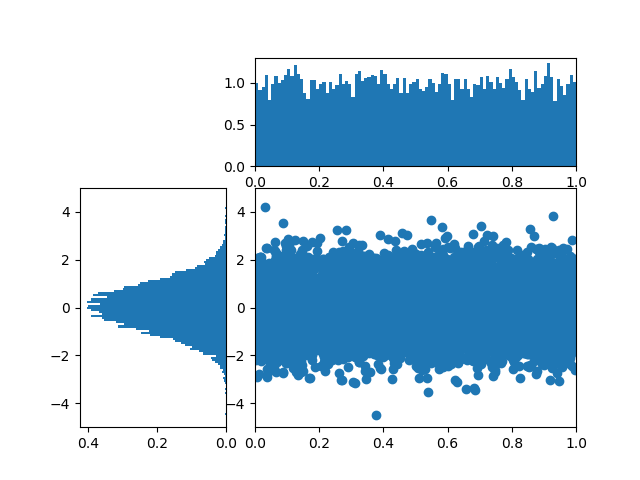

In [17]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

### Box and Whisker Plots

<IPython.core.display.Javascript object>


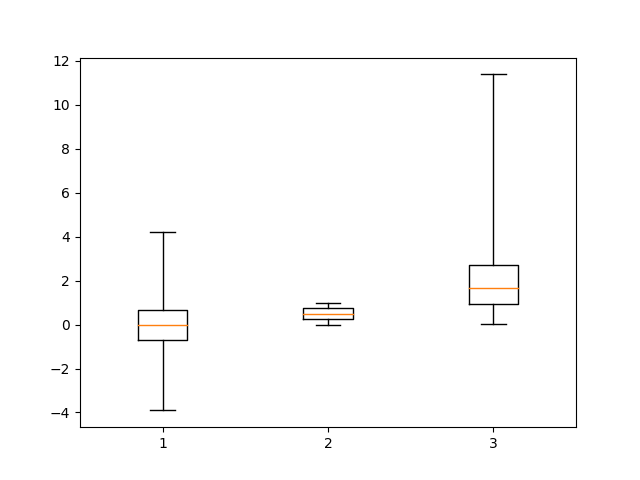

In [18]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

### Heatmaps

<IPython.core.display.Javascript object>


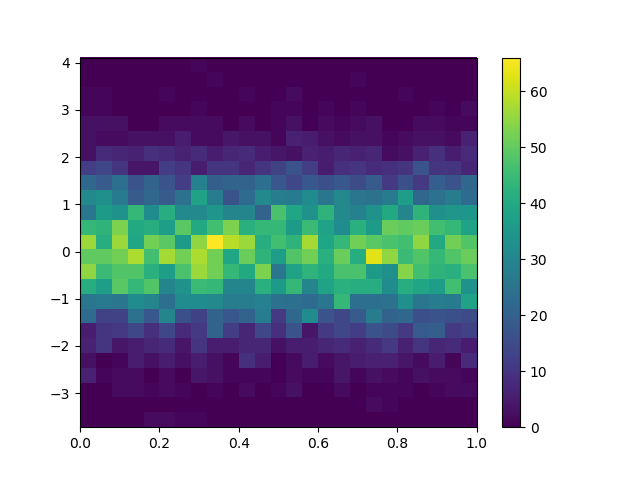

In [19]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

# add a colorbar legend
plt.colorbar()

### Animations

<IPython.core.display.Javascript object>


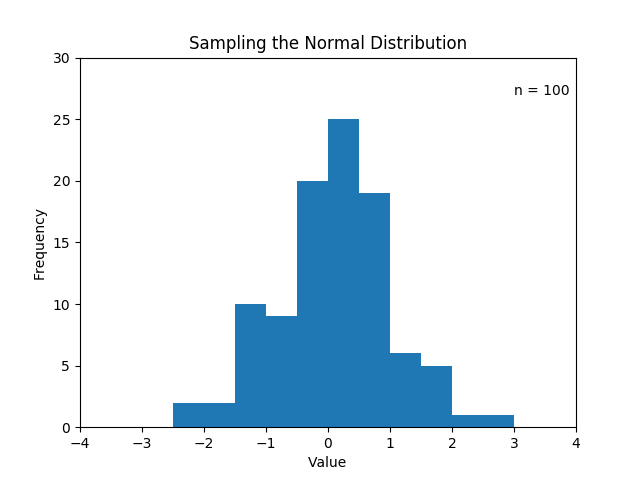

In [22]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

### Interactivity

<IPython.core.display.Javascript object>


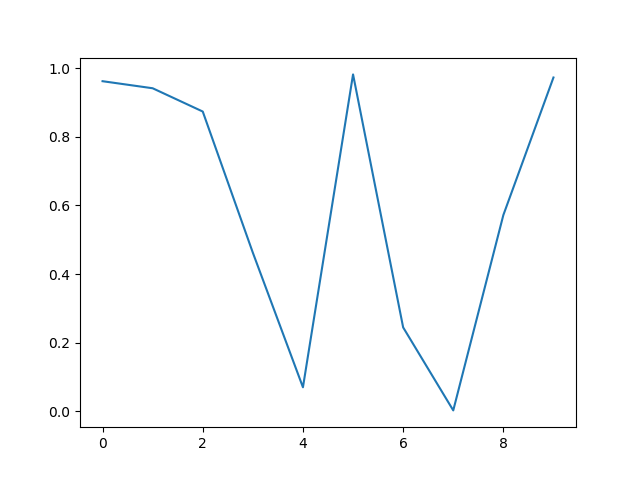

7

In [23]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


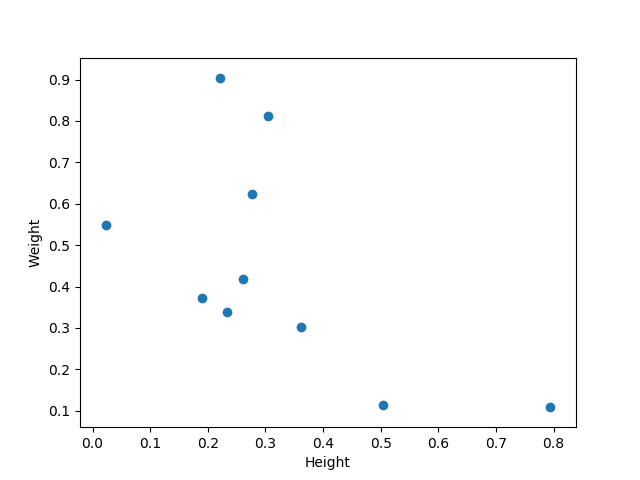

7

In [24]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})

plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

### Pandas visualization

In [25]:
# see the pre-defined styles provided.
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

### DataFrame.plot

<IPython.core.display.Javascript object>


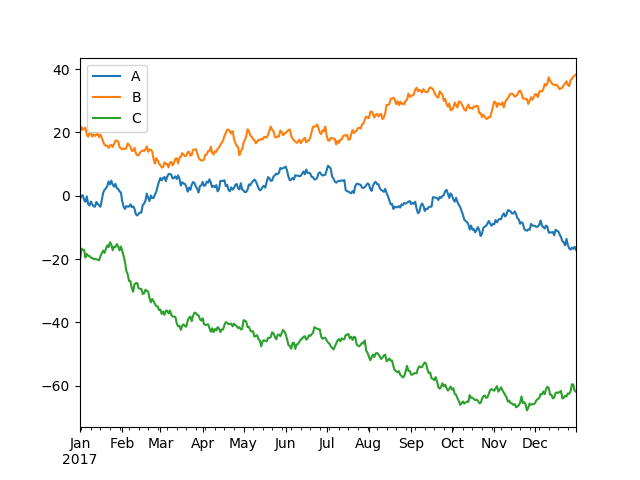

In [26]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

<IPython.core.display.Javascript object>


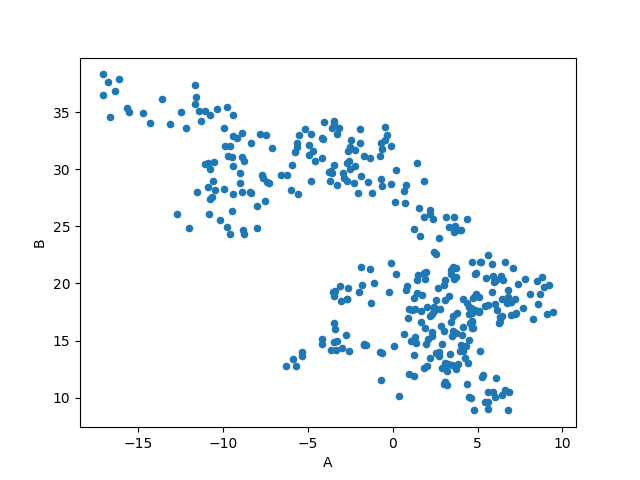

In [28]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


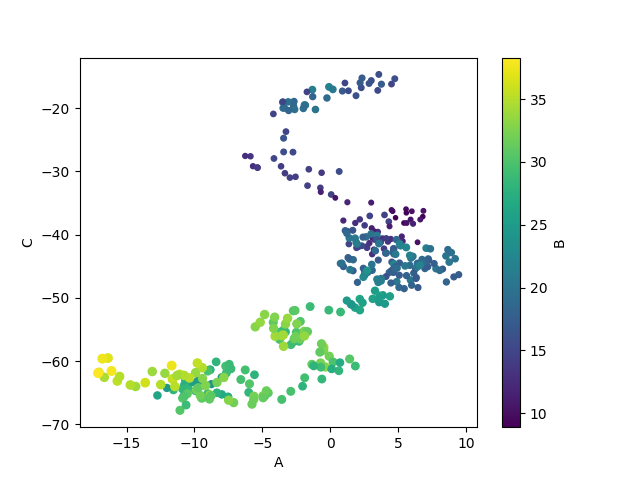

In [30]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


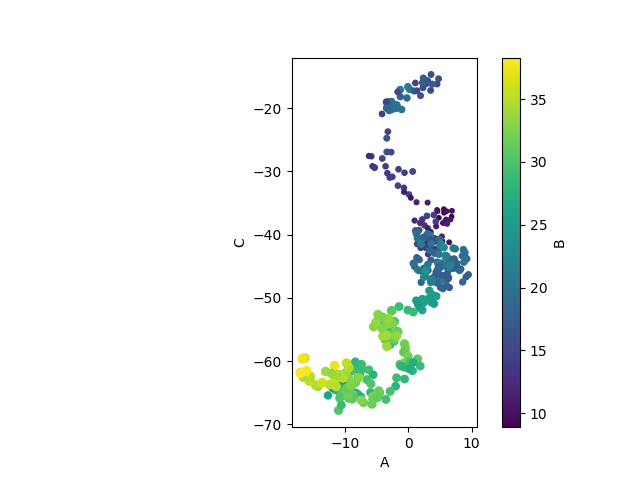

In [31]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


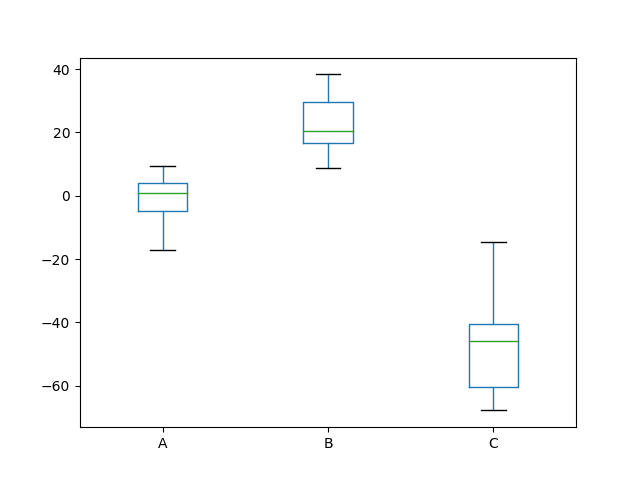

In [32]:
df.plot.box();

<IPython.core.display.Javascript object>


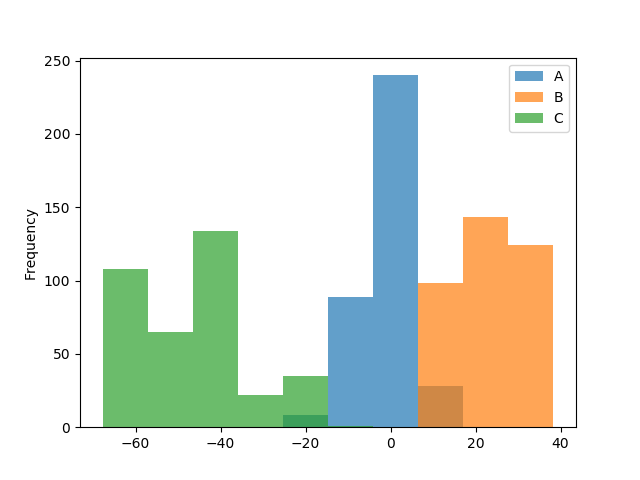

In [33]:
df.plot.hist(alpha=0.7);

<IPython.core.display.Javascript object>


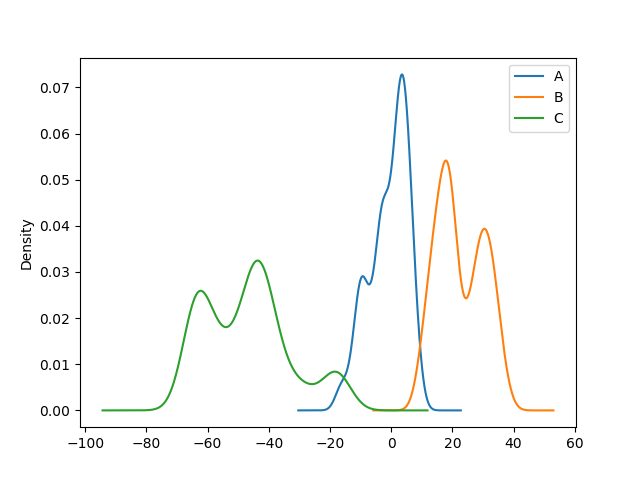

In [34]:
df.plot.kde();

### Seaborn

<IPython.core.display.Javascript object>


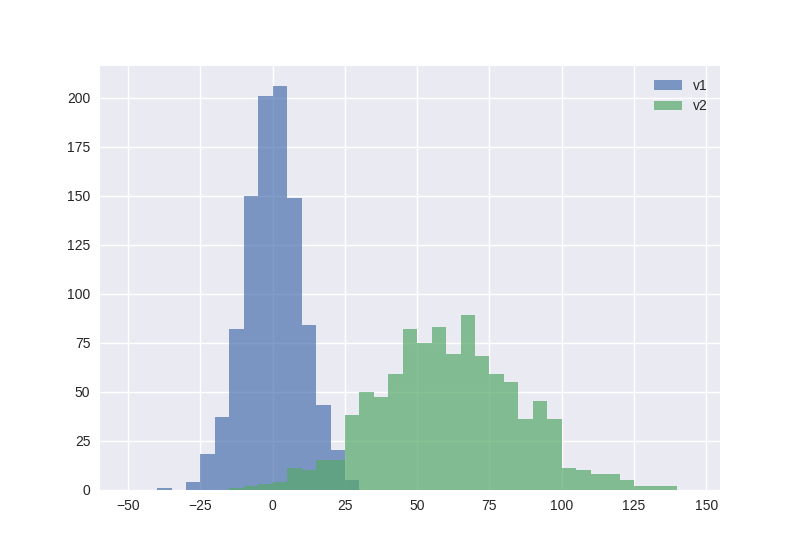

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


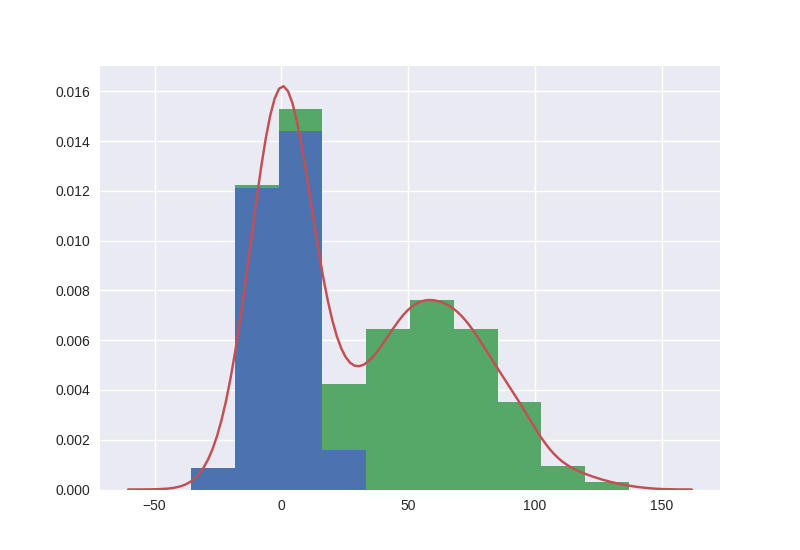

In [37]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


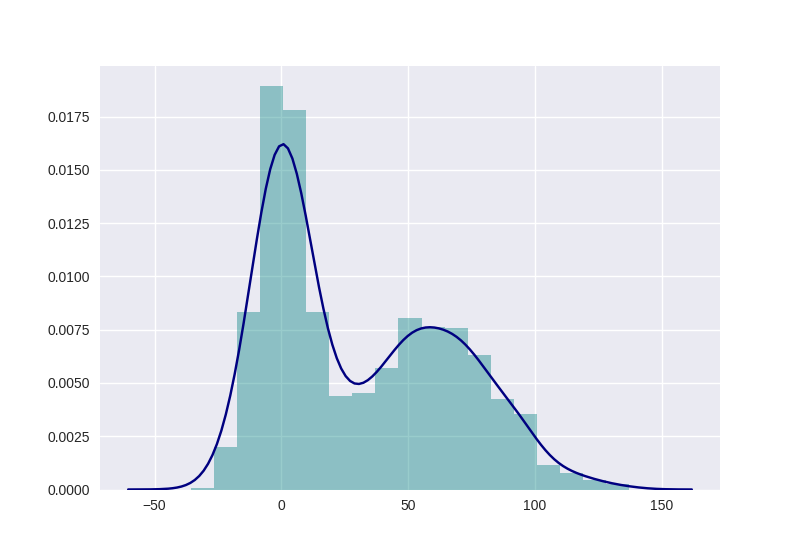

In [38]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

/home/qiangwennorge/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


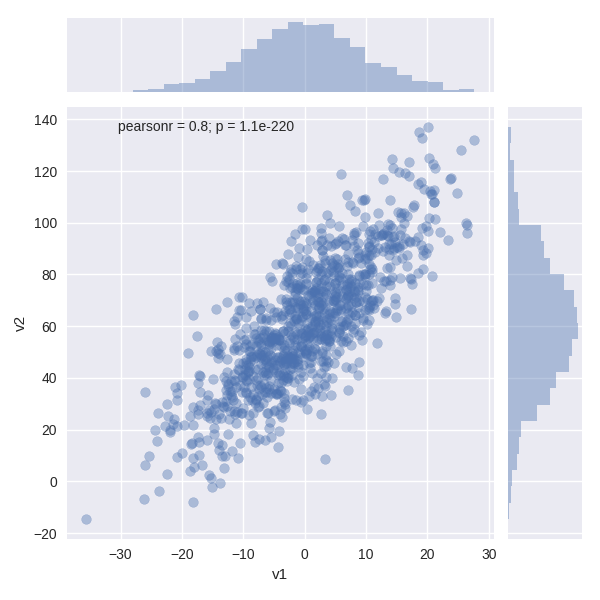

In [39]:
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


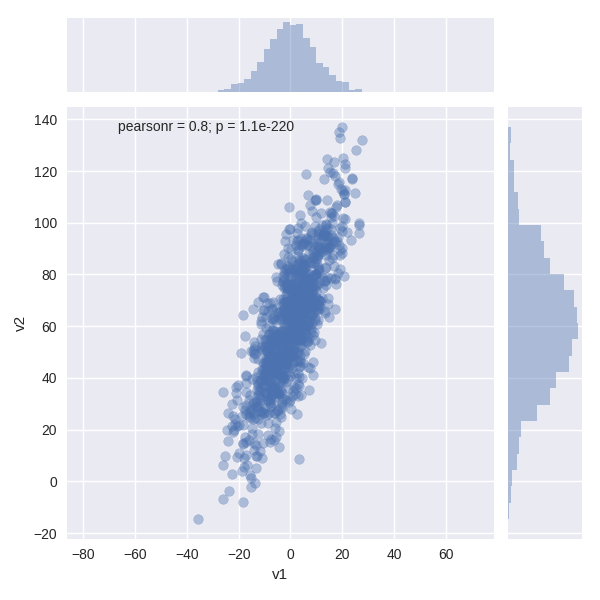

In [40]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


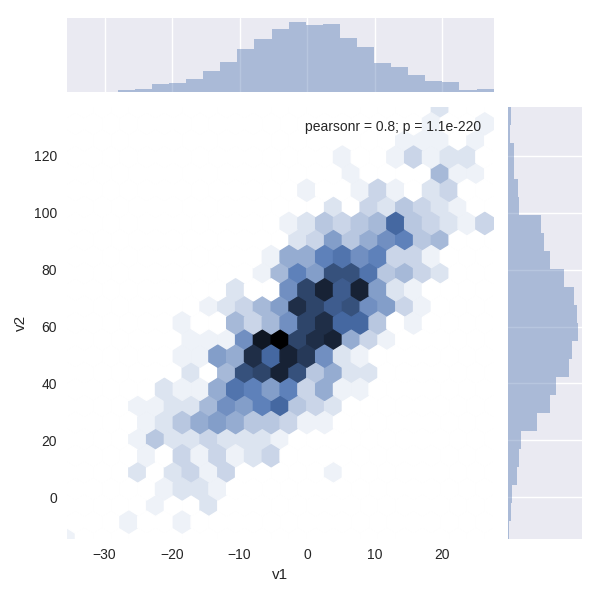

In [42]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


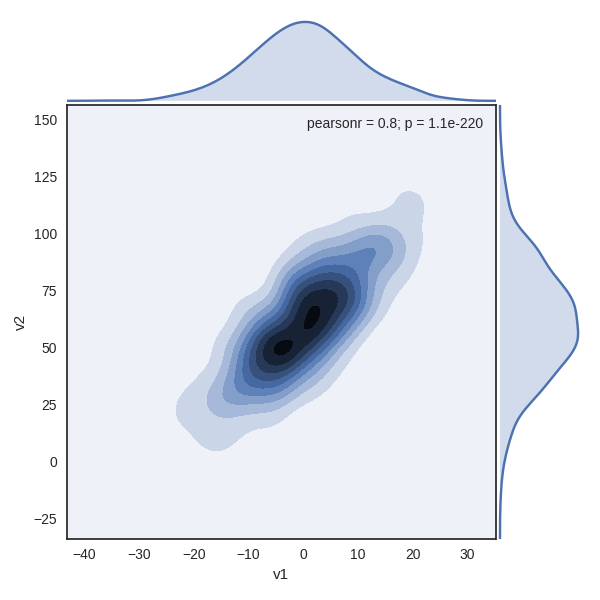

In [43]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);